# Homework 1: Pandas Basics

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df_1995 = pd.read_csv('names/yob1995.txt')

In [25]:
dfs = []
years = range(1880, 2015)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

# Question 4

In [10]:
df_topten = df_1995.sort('birth_count', ascending=False)

In [11]:
df_topten.head(10) # Question 4(a) 

,name,gender,birth_count
25236,Michael,M,41403
7446,Matthew,M,32874
24365,Christopher,M,32668
16553,Jacob,M,31122
16986,Joshua,M,30715
16349,Nicholas,M,29156
22273,Tyler,M,29153
13046,Jessica,F,27938
23033,Brandon,M,26901
3026,Daniel,M,26702


In [15]:
df_tenmale = df_topten[(df_topten.gender == 'M')]

In [16]:
df_tenmale.head(10) # Question 4(b)

,name,gender,birth_count
25236,Michael,M,41403
7446,Matthew,M,32874
24365,Christopher,M,32668
16553,Jacob,M,31122
16986,Joshua,M,30715
16349,Nicholas,M,29156
22273,Tyler,M,29153
23033,Brandon,M,26901
3026,Daniel,M,26702
2393,Austin,M,25906


In [17]:
df_ten_female = df_topten[(df_topten.gender == 'F')]

In [18]:
df_ten_female.head(10) # Question 4(c)

,name,gender,birth_count
13046,Jessica,F,27938
23171,Ashley,F,26603
12165,Emily,F,24377
19798,Samantha,F,21646
15869,Sarah,F,21365
5046,Taylor,F,20424
17535,Hannah,F,17012
1811,Brittany,F,16477
13226,Amanda,F,16344
10566,Elizabeth,F,16183


In [20]:
df_1995['birth_count'].mean() # Question 4(d)

140.36652607361964

In [21]:
df_tenmale['birth_count'].median() # Question 4(e)

11.0

In [22]:
df_ten_female['birth_count'].max() # Question 4(f)

27938

# Question 5

In [24]:
grouped = df_all.groupby('year')

In [29]:
df_births_by_year = grouped.aggregate(np.sum)

In [30]:
df_births_by_year # Question 5(a)

,birth_count
year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
1885,240855
1886,255319
1887,247396
1888,299480


In [27]:
grouped_2 = df_all.groupby(['year', 'gender'])

In [31]:
df_births_by_year_gender = grouped_2.aggregate(np.sum) 

In [32]:
df_births_by_year_gender # Question 5(b)

birth_count
year gender             
1880 F             90993
     M            110491
1881 F             91954
     M            100745
1882 F            107850
     M            113688
1883 F            112321
     M            104629
1884 F            129022
     M            114445
1885 F            133055
     M            107800
1886 F            144535
     M            110784
1887 F            145982
     M            101414
1888 F            178627
     M            120853
1889 F            178366
     M            110584
1890 F            190377
     M            111025
1891 F            185482
     M            101196
1892 F            212346
     M            122037
1893 F            212906
     M            112317
1894 F            222922
     M            115772
...                  ...
2000 F           1814601
     M           1962406
2001 F           1799049
     M           1941251
2002 F           1795206
     M           1939815
2003 F           1825359
     M           1973434
2004 F           1834145
     M           1982794
2005 F           1845379
     M           1994841
2006 F           1898463
     M           2052377
2007 F           1919408
     M           2072139
2008 F           1887234
     M           2036289
2009 F           1832925
     M           1979303
2010 F           1772738
     M           1913851
2011 F           1753500
     M           1893230
2012 F           1753922
     M           1889414
2013 F           1745339
     M           1881463
2014 F           1768775
     M           1901376

[270 rows x 1 columns]

In [34]:
df_births_by_year_sorted = df_births_by_year.sort('birth_count', ascending=False)

In [35]:
df_births_by_year_sorted.head(1) # Question 5(c)

,birth_count
year,
1957,4200026


In [42]:
df_all_gender = df_all[(df_all.gender == 'M')]

In [46]:
grouped_3 = df_all_gender.groupby('year')

In [47]:
df_male_birth = grouped_3.aggregate(np.sum) 

In [49]:
df_male_birth_top = df_male_birth.sort('birth_count', ascending=False)

In [65]:
df_male_birth_top.head(1) # Question 5(d)

,birth_count
year,
1957,2155866


In [52]:
df_all_female = df_all[(df_all.gender == 'F')]

In [53]:
grouped_4 = df_all_female.groupby('year')

In [54]:
df_female_birth = grouped_4.aggregate(np.sum)

In [62]:
df_male_female = (abs(df_male_birth - df_female_birth).sort(['birth_count'], ascending=False))

In [63]:
df_male_female.head(1) # Question 5(e)

,birth_count
year,
1910,202283


In [68]:
dfs = []
years = range(1990, 2000)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all_90s = pd.concat(dfs, ignore_index=True)

In [73]:
df_all_90s_male = df_all_90s[(df_all_90s.gender == 'M')]

In [91]:
df_90s_male = df_all_90s_male.drop('year', 1)

In [94]:
group = df_90s_male.groupby(['name'])

In [95]:
df_male_names_90s = group.aggregate(np.sum) 

In [97]:
df_90s_male_total = df_male_names_90s.sort('birth_count', ascending=False)

In [99]:
df_90s_male_total.head(5) # Question 5(f)


,birth_count
name,
Michael,462278
Christopher,360176
Matthew,351580
Joshua,329082
Jacob,298249


In [100]:
dfs = []
years = range(1901, 2001)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all_20century = pd.concat(dfs, ignore_index=True)

In [101]:
df_all_century_female = df_all_20century[(df_all_20century.gender == 'F')]

In [102]:
df_century_female = df_all_century_female.drop('year', 1)

In [103]:
group1 = df_century_female.groupby(['name'])

In [104]:
df_female_names_century = group1.aggregate(np.sum) 

In [105]:
df_20century_female_total = df_female_names_century.sort('birth_count', ascending=False)

In [106]:
df_20century_female_total.head(5) # Question 5(g)

,birth_count
name,
Mary,3822567
Patricia,1560081
Linda,1440703
Barbara,1422236
Jennifer,1398644


In [4]:
dfs= []
years = range(1990, 2000)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all_90s = pd.concat(dfs, ignore_index=True)

In [5]:
df_all_90s_pivot = df_all_90s.pivot_table(index = 'name', columns='gender', aggfunc = 'sum')

In [17]:
df_all_90s_pivot_new1 = df_all_90s_pivot.fillna(0)

In [18]:
df_all_90s_pivot_new = df_all_90s_pivot_new1.drop('year', 1)

In [19]:
df_all_90s_pivot_neutrality = df_all_90s_pivot_new.min(axis = 1)

In [20]:
df_all_90s_pivot_new['neutrality'] = df_all_90s_pivot_neutrality

In [22]:
df_neutrality = df_all_90s_pivot_new.sort('neutrality', ascending=False)

In [23]:
df_neutrality.head(10) # Question 5(h)

birth_count         neutrality
gender              F       M           
name                                    
Jordan          61742  144719      61742
Taylor         169010   58392      58392
Casey           25895   29244      25895
Angel           19496   36980      19496
Alexis         131174   16253      16253
Dominique       23642   10980      10980
Riley           10230   18833      10230
Morgan          91179   10098      10098
Bailey          31614    9924       9924
Jessie          10137    9296       9296

# Question 6

In [29]:
total_births_gender_yr = df_all.pivot_table ('birth_count', 'year', 'gender', aggfunc=sum)

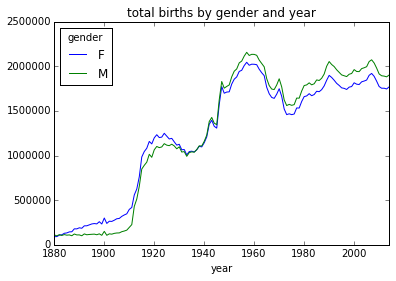

In [30]:
total_births_gender_yr.plot(title = 'total births by gender and year') # Question 6(a)

In [31]:
df_mike = df_all[(df_all.name == 'Mike') & (df_all.gender == 'M')]

In [32]:
df_mike_yr = df_mike.set_index('year')

In [35]:
df_all_males = df_all[(df_all.gender == 'M')]

In [45]:
group_yr = df_all_males.groupby('year')

In [46]:
df_all_males_sum = group_yr.aggregate(np.sum)

In [49]:
df_mike_males = pd.concat([df_mike_yr.birth_count, df_all_males_sum.birth_count], axis = 1)

In [50]:
df_mike_males.columns = ['mike', 'male']

In [51]:
df_mike_males_div = df_mike_males['mike'] / df_mike_males['male']

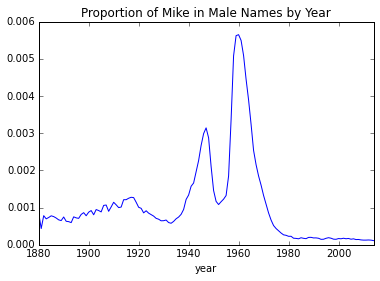

In [52]:
df_mike_males_div.plot(title = 'Proportion of Mike in Male Names by Year') # Question 6(b)

# Question 7

(a) What is the relationship between IPython and IPython Notebook?
    IPython provides the architecture for interactive computing, and IPython Notebook is an interactive computational environment in which "you can combine code execution, rich text, mathematics, plots and rich media" (http://ipython.org/notebook.html).
    
(b) Python already provides an interactive console. What is the advantage of using IPython?
    IPython supports data visualization and useful toolkits (http://ipython.org). It supports NumPy and Pandas, which are two very useful data structures.
    
(c) Python already provides various built-in data structures. What is the advantage of using the data structures offered by NumPy? Furthermore, what is the advantage of using data structures of Pandas?
    NumPy supports "large, multi-dimensional arrays and matrices" (https://en.wikipedia.org/wiki/NumPy). Pandas is useful for data manipulation and analysis, especially manipulating numerical tables and time series (https://en.wikipedia.org/wiki/Pandas_(software)). NumPy runs large data functions and Pandas supports large data manipulation.



****WORKED WITH: Brandon Wong and Tom Zidar